In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd

from analysis_utils import get_df

In [2]:
identifier = '*'
df = get_df(identifier)

# (TODO) Filtering: Only Consider Internally Consistent (5 targets all better than DAS)

# (TODO) Filtering: Only Consider Externally Consistent (3 experiments all better than DAS)

In [3]:
df

,input_size,output_size,batch_norm,use_pooling,pooling_method,conv1_kernel_size,conv1_num_kernels,conv1_stride,conv1_dropout,pool1_kernel_size,...,target_phantom_anechoic_cyst_2p5mm_target_4_snr_das,target_phantom_anechoic_cyst_2p5mm_target_4_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_snr_das,target_phantom_anechoic_cyst_2p5mm_target_1_snr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_cnr_das,target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_snr_das,target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn
0,65,130,1,0,max,6,36,1,0,2,...,2.0478,1.9155,4.3994,4.28260,1.9298,1.7657,4.23996,4.490180,1.94274,1.82614
1,65,130,1,0,max,6,28,1,0,2,...,2.0478,1.9113,4.3994,4.00410,1.9298,1.7461,4.23996,4.304080,1.94274,1.82112
2,65,130,1,0,max,7,22,1,0,3,...,2.0478,1.6433,4.3994,2.78740,1.9298,1.4706,4.23996,2.969780,1.94274,1.53340
3,65,130,1,0,max,9,39,1,0,3,...,2.0478,2.2009,4.3994,-0.67413,1.9298,2.2705,4.23996,-1.383780,1.94274,2.27944
4,65,130,1,0,max,6,16,1,0,2,...,2.0478,1.6273,4.3994,3.03240,1.9298,1.5124,4.23996,3.319260,1.94274,1.59118
5,65,130,1,0,max,7,37,1,0,3,...,2.0478,2.0063,4.3994,4.75090,1.9298,1.8762,4.23996,4.986300,1.94274,1.93588
6,65,130,1,0,max,30,26,1,0,2,...,2.0478,2.1561,4.3994,-0.81913,1.9298,2.2345,4.23996,-1.332630,1.94274,2.21648
7,65,130,1,0,max,9,24,1,0,3,...,2.0478,1.9445,4.3994,4.73470,1.9298,1.8186,4.23996,4.812740,1.94274,1.85838
8,65,130,1,0,max,6,26,1,0,2,...,2.0478,1.8367,4.3994,3.47530,1.9298,1.6387,4.23996,3.798840,1.94274,1.72370
9,65,130,1,0,max,7,18,1,0,3,...,2.0478,1.8539,4.3994,3.78410,1.9298,1.6889,4.23996,4.026740,1.94274,1.78562


In [4]:
df = df.query('target_anechoic_cyst_5mm_avg_cnr_dnn >= target_anechoic_cyst_5mm_avg_cnr_das & \
               target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn >= target_phantom_anechoic_cyst_2p5mm_avg_cnr_das & \
               target_in_vivo_avg_cnr_dnn >= target_in_vivo_avg_cnr_das')

In [5]:
df

,input_size,output_size,batch_norm,use_pooling,pooling_method,conv1_kernel_size,conv1_num_kernels,conv1_stride,conv1_dropout,pool1_kernel_size,...,target_phantom_anechoic_cyst_2p5mm_target_4_snr_das,target_phantom_anechoic_cyst_2p5mm_target_4_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_snr_das,target_phantom_anechoic_cyst_2p5mm_target_1_snr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_cnr_das,target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_snr_das,target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn
7,65,130,1,0,max,9,24,1,0,3,...,2.0478,1.9445,4.3994,4.7347,1.9298,1.8186,4.23996,4.81274,1.94274,1.85838
18,65,130,1,0,max,8,18,1,0,2,...,2.0478,1.9586,4.3994,4.8657,1.9298,1.8401,4.23996,4.83442,1.94274,1.86720
27,65,130,1,0,max,6,16,1,0,2,...,2.0478,1.9890,4.3994,4.7302,1.9298,1.8302,4.23996,4.82906,1.94274,1.87890
29,65,130,1,0,max,7,36,1,0,3,...,2.0478,1.9686,4.3994,4.8709,1.9298,1.8542,4.23996,4.87458,1.94274,1.88732
34,65,130,1,0,max,7,34,1,0,3,...,2.0478,1.9649,4.3994,4.7634,1.9298,1.8457,4.23996,4.88658,1.94274,1.89258
37,65,130,1,0,max,9,40,1,0,3,...,2.0478,1.9672,4.3994,4.6883,1.9298,1.8367,4.23996,4.80180,1.94274,1.88570
38,65,130,1,0,max,9,26,1,0,3,...,2.0478,1.9878,4.3994,4.9228,1.9298,1.8630,4.23996,4.93100,1.94274,1.89526
41,65,130,1,0,max,9,24,1,0,3,...,2.0478,1.9793,4.3994,4.6979,1.9298,1.8604,4.23996,4.77208,1.94274,1.90068
42,65,130,1,0,max,7,21,1,0,3,...,2.0478,1.9712,4.3994,4.7999,1.9298,1.8451,4.23996,4.84900,1.94274,1.88622
44,65,130,1,0,max,6,36,1,0,2,...,2.0478,2.0038,4.3994,4.8052,1.9298,1.8714,4.23996,4.87480,1.94274,1.91106


# Filter by Less or Equal SNR

In [6]:
df = df.query('target_anechoic_cyst_5mm_avg_snr_dnn <= target_anechoic_cyst_5mm_avg_snr_das & \
               target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn <= target_phantom_anechoic_cyst_2p5mm_avg_snr_das & \
               target_in_vivo_avg_snr_dnn <= target_in_vivo_avg_snr_das')

In [7]:
df

,input_size,output_size,batch_norm,use_pooling,pooling_method,conv1_kernel_size,conv1_num_kernels,conv1_stride,conv1_dropout,pool1_kernel_size,...,target_phantom_anechoic_cyst_2p5mm_target_4_snr_das,target_phantom_anechoic_cyst_2p5mm_target_4_snr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_das,target_phantom_anechoic_cyst_2p5mm_target_1_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_target_1_snr_das,target_phantom_anechoic_cyst_2p5mm_target_1_snr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_cnr_das,target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn,target_phantom_anechoic_cyst_2p5mm_avg_snr_das,target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn
7,65,130,1,0,max,9,24,1,0,3,...,2.0478,1.9445,4.3994,4.7347,1.9298,1.8186,4.23996,4.81274,1.94274,1.85838
18,65,130,1,0,max,8,18,1,0,2,...,2.0478,1.9586,4.3994,4.8657,1.9298,1.8401,4.23996,4.83442,1.94274,1.86720
27,65,130,1,0,max,6,16,1,0,2,...,2.0478,1.9890,4.3994,4.7302,1.9298,1.8302,4.23996,4.82906,1.94274,1.87890
29,65,130,1,0,max,7,36,1,0,3,...,2.0478,1.9686,4.3994,4.8709,1.9298,1.8542,4.23996,4.87458,1.94274,1.88732
34,65,130,1,0,max,7,34,1,0,3,...,2.0478,1.9649,4.3994,4.7634,1.9298,1.8457,4.23996,4.88658,1.94274,1.89258
37,65,130,1,0,max,9,40,1,0,3,...,2.0478,1.9672,4.3994,4.6883,1.9298,1.8367,4.23996,4.80180,1.94274,1.88570
38,65,130,1,0,max,9,26,1,0,3,...,2.0478,1.9878,4.3994,4.9228,1.9298,1.8630,4.23996,4.93100,1.94274,1.89526
41,65,130,1,0,max,9,24,1,0,3,...,2.0478,1.9793,4.3994,4.6979,1.9298,1.8604,4.23996,4.77208,1.94274,1.90068
42,65,130,1,0,max,7,21,1,0,3,...,2.0478,1.9712,4.3994,4.7999,1.9298,1.8451,4.23996,4.84900,1.94274,1.88622
44,65,130,1,0,max,6,36,1,0,2,...,2.0478,2.0038,4.3994,4.8052,1.9298,1.8714,4.23996,4.87480,1.94274,1.91106


# CNR Distribution: Simulation, Phantom, and In Vivo

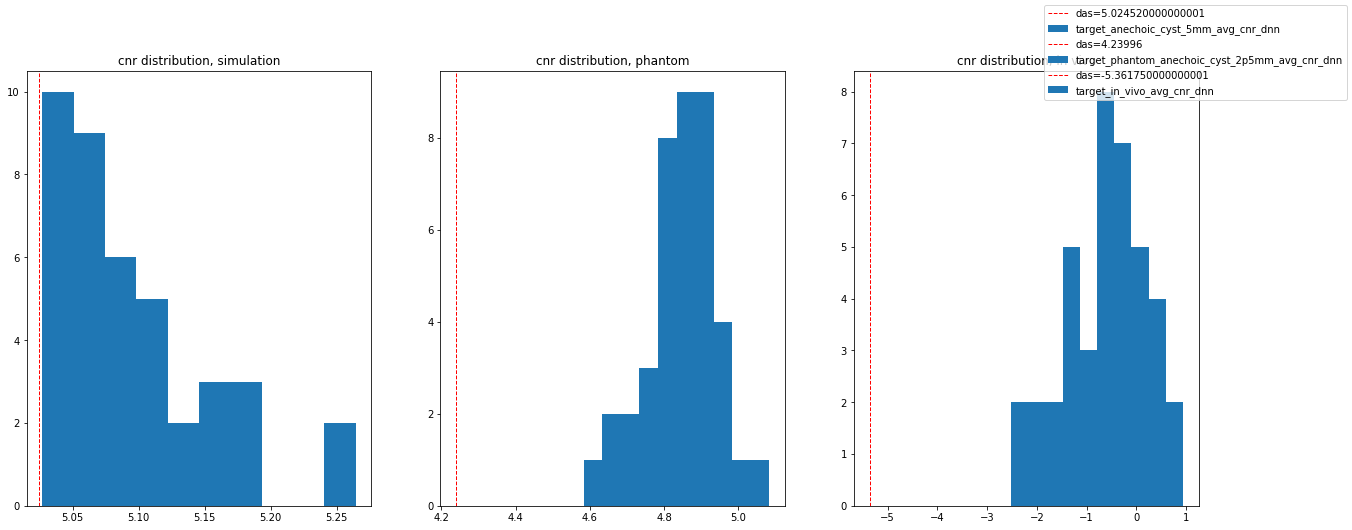

In [8]:
import random 
random_row = random.choice(df.index)

cnr_simulation_das = df.loc[random_row, 'target_anechoic_cyst_5mm_avg_cnr_das']
fig, axes = plt.subplots(1, 3, figsize=(21,8))
axes[0].hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'])
axes[0].axvline(cnr_simulation_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_simulation_das))
axes[0].set_title('cnr distribution, simulation')

cnr_phantom_das = df.loc[random_row, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_das']
axes[1].hist(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
axes[1].axvline(cnr_phantom_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_phantom_das))
axes[1].set_title('cnr distribution, phantom')

cnr_in_vivo_das = df.loc[random_row, 'target_in_vivo_avg_cnr_das']
axes[2].hist(df['target_in_vivo_avg_cnr_dnn'])
axes[2].axvline(cnr_in_vivo_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_in_vivo_das))
axes[2].set_title('cnr distribution, in vivo')

# TODO: DNNs
# axes[1, 0].hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'])
# axes[1, 0].axvline(cnr_simulation_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_simulation_das))
# axes[1, 0].set_title('cnr distribution, simulation')

# cnr_phantom_das = df.loc[0, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_das']
# axes[1, 1].hist(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
# axes[1, 1].axvline(cnr_phantom_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_phantom_das))
# axes[1, 1].set_title('cnr distribution, phantom')

# cnr_in_vivo_das = df.loc[0, 'target_in_vivo_avg_cnr_das']
# axes[1, 2].hist(df['target_in_vivo_avg_cnr_dnn'])
# axes[1, 2].axvline(cnr_in_vivo_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_in_vivo_das))
# axes[1, 2].set_title('cnr distribution, in vivo')


fig.legend()
plt.show()

# CNR Correlation: Simulation vs Phantom vs In Vivo

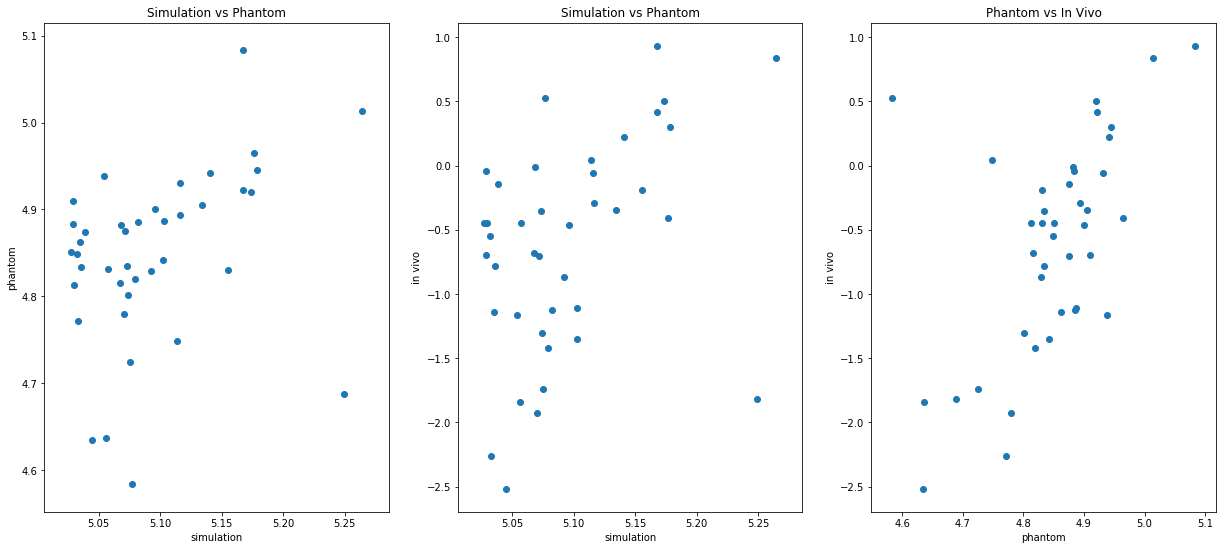

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(21, 9))

axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'])
axes[0].set_xlabel('simulation')
axes[0].set_ylabel('phantom')
axes[0].set_title('Simulation vs Phantom')

axes[1].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_in_vivo_avg_cnr_dnn'])
axes[1].set_xlabel('simulation')
axes[1].set_ylabel('in vivo')
axes[1].set_title('Simulation vs Phantom')

axes[2].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'], df['target_in_vivo_avg_cnr_dnn'])
axes[2].set_xlabel('phantom')
axes[2].set_ylabel('in vivo')
axes[2].set_title('Phantom vs In Vivo')

plt.show()

# CNR vs Loss

# Speckle SNR vs Loss

# CNR vs Hyperparams

In [10]:
# # Simulated Cyst CNR vs Model Params

hyperparams = [ \
 'batch_norm',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
 'conv1_dropout',
               
 'pool1_kernel_size',
 'pool1_stride',
               
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
               
 'pool2_kernel_size',
 'pool2_stride',
               
 'fcs_hidden_size',
 'fcs_dropout',
 'fcs_num_hidden_layers',
               
               
#  'data_is_target',
 'data_noise_gaussian',
#  'data_train',
#  'data_val',
#  'k',
#  'patience',
#  'save_initial',
#  'weight_decay',
#  'batch_size',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
          
 'learning_rate',
 'optimizer',
 'momentum',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))


# Find Max CNR Row

In [11]:
print(df.loc[df['target_anechoic_cyst_5mm_avg_cnr_dnn'].idxmax()]['name']) # simulation
print(df.loc[df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'].idxmax()]['name']) # phantom
print(df.loc[df['target_in_vivo_avg_cnr_dnn'].idxmax()]['name']) # in vivo


20180718164411_5_evaluated
20180705164352_46_evaluated
20180705164352_46_evaluated


# CNR vs SNR

In [26]:
def label_point(df, x, y, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in df.iterrows():
        ax.text(point[x], point[y], str(i))

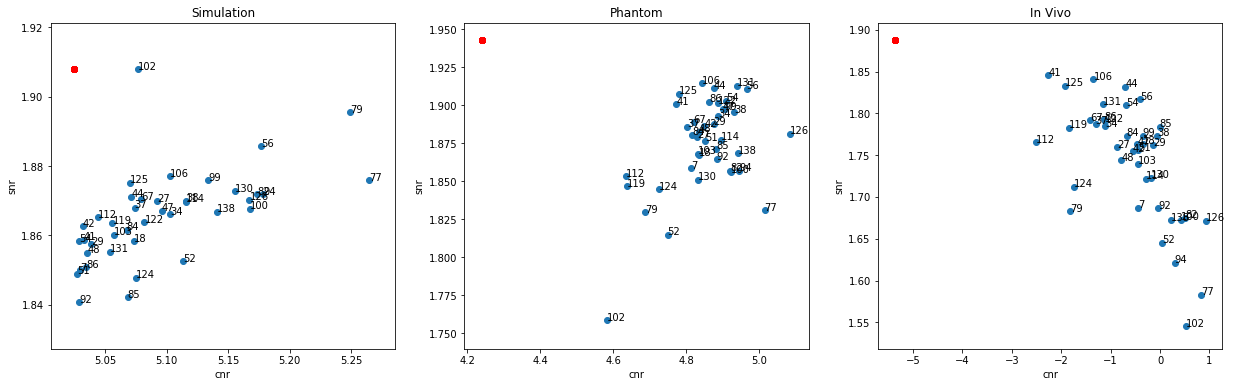

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Simulation
axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], df['target_anechoic_cyst_5mm_avg_snr_dnn'])
axes[0].scatter(df['target_anechoic_cyst_5mm_avg_cnr_das'], df['target_anechoic_cyst_5mm_avg_snr_das'], color='red')
axes[0].set_xlabel('cnr')
axes[0].set_ylabel('snr')
axes[0].set_title('Simulation')
label_point(df, 'target_anechoic_cyst_5mm_avg_cnr_dnn', 'target_anechoic_cyst_5mm_avg_snr_dnn', axes[0])

# Phantom
axes[1].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn'], df['target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn'])
axes[1].scatter(df['target_phantom_anechoic_cyst_2p5mm_avg_cnr_das'], df['target_phantom_anechoic_cyst_2p5mm_avg_snr_das'], color='red')
axes[1].set_xlabel('cnr')
axes[1].set_ylabel('snr')
axes[1].set_title('Phantom')
label_point(df, 'target_phantom_anechoic_cyst_2p5mm_avg_cnr_dnn', 'target_phantom_anechoic_cyst_2p5mm_avg_snr_dnn', axes[1])

# In Vivo
axes[2].scatter(df['target_in_vivo_avg_cnr_dnn'], df['target_in_vivo_avg_snr_dnn'])
axes[2].scatter(df['target_in_vivo_avg_cnr_das'], df['target_in_vivo_avg_snr_das'], color='red')
axes[2].set_xlabel('cnr')
axes[2].set_ylabel('snr')
axes[2].set_title('In Vivo')
label_point(df, 'target_in_vivo_avg_cnr_dnn', 'target_in_vivo_avg_snr_dnn', axes[2])




plt.show()

In [14]:
import matplotlib.image as mpimg
import os

model_name = '20180705164352_21_evaluated'
model_folder = os.path.join('..', 'DNNs', model_name)

def inspect_by_name(model_name):
    f, axes = plt.subplots(1,2)
    plt.axis('off')
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_17', 'das.png'))
    imgplot = axes[0].imshow(img)
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_17', 'dnn.png'))
    imgplot = axes[1].imshow(img)
    
    f, axes = plt.subplots(1,2)
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_19', 'das.png'))
    imgplot = axes[0].imshow(img)
    axes[0]
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_19', 'dnn.png'))
    imgplot = axes[1].imshow(img)
    
    plt.subplots_adjust(wspace=0, hspace=0)

    
    plt.show()
    

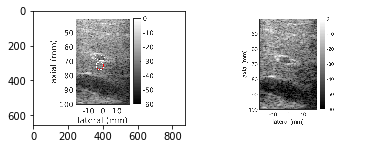

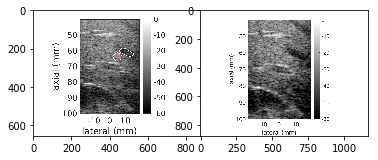

In [15]:
inspect_by_name(model_name)